In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train_cleaned.csv')

In [3]:
x = train.values[:, :-2]
y = train.values[:, -2]
y = y.reshape((1456,1))

In [4]:
x.shape

(1456, 202)

In [5]:
y.shape

(1456, 1)

In [6]:
def add_column(X):
    ones_and_x = np.insert(X, 0, 1, axis=1)
    return ones_and_x

def predict(X, theta):
    X_prime = add_column(X)
    pred = np.dot(X_prime,theta)    
    return pred

def loss(X, y, theta, lambda_):
    m = X.shape[0]
    reg_term = np.sum(lambda_*(theta[1:])**2)/(2*m)
    X_prime = add_column(X)
    pred = predict(X, theta)
    m = len(X)
    loss = (np.sum((pred - y)**2)) / (2*m) + reg_term
    return loss

theta_init = np.zeros((203, 1))
print(loss(x, y, theta_init, 0.01))

72.35570449472941


estimated theta value [3.20673130e-02 8.65256779e-02 3.04282250e-03 2.19782060e-02
 4.23211691e-02 4.79709629e-02 3.55662131e-02 1.29115708e-01
 2.11650575e-02 4.04514260e-02 5.92351167e-02 9.26384394e-03
 1.52377103e-03 3.97263101e-02 1.76049575e-01 2.35275534e-02
 4.93066899e-02 3.97890121e-02 4.67565843e-02 4.36346052e-02
 1.25762827e-02 2.93254107e-02 6.05437564e-02 3.09704552e-02
 5.55228044e-02 3.02962912e-02 5.51708412e-02 2.32393341e-01
 8.07743657e-03 2.23126416e-02 2.30580202e-02 1.58797120e-03
 2.91460842e-01 1.34822013e-01 2.96558043e-02 3.53312045e-03
 6.22081380e-02 6.32803363e-02 7.68007577e-03 6.02259577e-02
 7.01175834e-02 5.44969910e-02 6.13615733e-02 3.26407061e-02
 1.15269244e-03 4.44327533e-02 1.31167430e-02 2.22963188e-02
 2.12244340e-01 7.44800404e-02 1.36785427e-01 9.81240693e-02
 2.88606871e-02 1.23922708e-02 1.08419870e-02 1.91133393e-02
 2.20255549e-02 2.06752836e-02 7.03274117e-04 1.34840754e-03
 9.56368596e-04 2.65030835e-03 2.96720510e-02 1.81526359e-03
 2

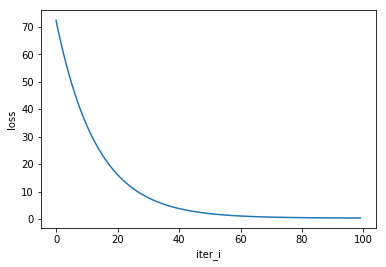

In [7]:
import scipy.optimize
from functools import partial

def loss_gradient(X, y, theta, lambda_):
    m = X.shape[0]
    X_prime = add_column(X)
    loss_grad = ((predict(X, theta) - y)*X_prime).mean(axis=0)[:, np.newaxis]
    loss_grad_with_reg = loss_grad + (lambda_/m) * theta
    loss_grad_with_reg[0] = loss_grad_with_reg[0] - (lambda_/m) * theta[0]
    return loss_grad_with_reg
    
def run_gd(loss, loss_gradient, X, y, theta_init, lr=0.0001, n_iter=100, lambda_ = 3.3):
    theta_current = theta_init.copy()
    loss_values = []
    theta_values = []
    
    for i in range(n_iter):
        loss_value = loss(X, y, theta_current, lambda_)
        theta_current -= lr * loss_gradient(X, y, theta_current, lambda_)
        loss_values.append(loss_value)
        theta_values.append(theta_current)
        
    return theta_current, loss_values, theta_values

result = run_gd(loss, loss_gradient, x, y, theta_init)
theta_est, loss_values, theta_values = result

print('estimated theta value', theta_est.ravel())
print('resulting loss', loss(x, y, theta_est, 3.3))
plt.ylabel('loss')
plt.xlabel('iter_i')
plt.plot(loss_values)
plt.show()

# Cross Validation, 4 Fold

In [8]:
splited_tranining_set_idx = np.load('splited_training_set.npy')

In [9]:
K = 4
theta_init = np.zeros((203, 1))

In [10]:
CV_score = []
for i in range(K):
    current_train_idx = splited_tranining_set_idx[i][0]
    current_test_idx = splited_tranining_set_idx[i][1]
    X = x[current_train_idx]
    Y = y[current_train_idx]
    
    result = run_gd(loss, loss_gradient, X, Y, theta_init)
    theta_est, loss_values, theta_values = result
    
    X_ = x[current_test_idx]
    Y_ = predict(X_, theta_est)
    Y_real = y[current_test_idx]
    cuurent_score = np.sqrt(sum((Y_ - Y_real)**2)/len(Y_real))
    CV_score += [cuurent_score]

In [11]:
CV_score

[array([0.80218712]),
 array([0.81777952]),
 array([0.90416349]),
 array([0.78261328])]

In [12]:
np.mean(CV_score)

0.8266858508316591

In [ ]:
0.8266858508316